/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


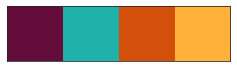

In [ ]:
# Supporting both python 2 and python 3.
from __future__ import division, print_function, unicode_literals

#importing neccessary libraries.
import numpy as np
import os
import pandas as pd

#Importing matplotlib.
#matplotlib is a visualization library in Python for 2D plots of arrays.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Importing Seabron.
#Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.
import seaborn as sns
sns.set_style('white')

#Defining custom palette.
customPalette = ['#630C3A', '#20B2AA', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


In [ ]:
# Import my spotify data.
songs = pd.read_csv(r"spotify.csv")
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   name              100 non-null    object 
 2   album             100 non-null    object 
 3   artist            100 non-null    object 
 4   release_date      100 non-null    object 
 5   length            100 non-null    int64  
 6   popularity        100 non-null    int64  
 7   danceability      100 non-null    float64
 8   acousticness      100 non-null    float64
 9   danceability.1    100 non-null    float64
 10  energy            100 non-null    float64
 11  instrumentalness  100 non-null    float64
 12  liveness          100 non-null    float64
 13  loudness          100 non-null    float64
 14  speechiness       100 non-null    float64
 15  tempo             100 non-null    float64
 16  time_signature    100 non-null    int64  
dty

In [ ]:
#Dropping unneccessary columns/data
songs = songs.drop(['Unnamed: 0','album','energy','release_date','tempo','length','popularity',
                    'danceability.1','instrumentalness','time_signature'],axis=1)
songs.head()

,name,artist,danceability,acousticness,liveness,loudness,speechiness
0,I Will Always Love You,Whitney Houston,0.306,0.8440,0.0839,-12.518,0.0356
1,Love of the Common People,Paul Young,0.744,0.0883,0.0599,-11.202,0.0758
2,Because I Love You,Shakin' Stevens,0.587,0.2440,0.1180,-12.891,0.0255
3,Song For Zula,Phosphorescent,0.492,0.7290,0.0509,-8.260,0.0349
4,Song for Zula,Ronnie Fauss,0.506,0.7340,0.0737,-6.931,0.0246


In [ ]:
#Describing numerical features.
songs.describe()

,danceability,acousticness,liveness,loudness,speechiness
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.625380,0.298293,0.170778,-7.264860,0.081449
std,0.153444,0.328817,0.112697,4.239447,0.071516
min,0.157000,0.000688,0.050900,-23.562000,0.024600
25%,0.558500,0.040075,0.093475,-8.034000,0.036600
50%,0.660000,0.169500,0.124000,-6.004500,0.054150
75%,0.728250,0.535250,0.217500,-4.784000,0.091025
max,0.903000,0.990000,0.638000,-2.528000,0.375000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc420512b0>,
      dtype=object)

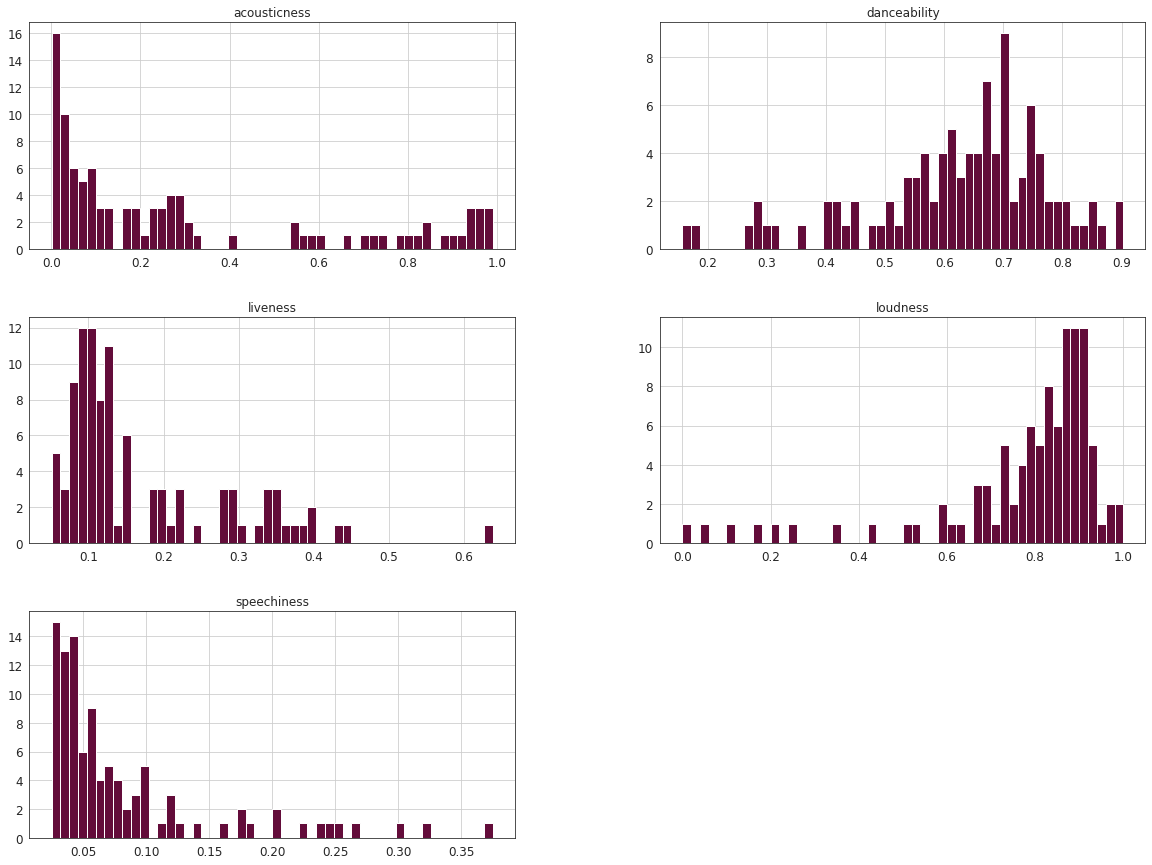

In [ ]:
#Importing preprocessing from sklearn.
#The sklearn.preprocessing package provides several common utility functions and transformer classes.
from sklearn import preprocessing

#Normalising loudness value between 0 to 1.
loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

#plotting histogram for different features we selected.
songs.hist(bins=50,figsize=(20,15))

In [ ]:
#Dropping song names and artist before clustering.
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist'],axis=1)

*Now the Data is Prepared, will now cluster the songs and identify a mood represented by each cluster.*

# K-Means Clustering Algorithm

*Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data. In clustering, we do not have a target to predict. We look at the data and then try to club similar observations and form different groups. Hence it is an unsupervised learning problem.
Using K-Means Clustering Algorithm, we can group data points into k-groups and discover emphazing patterns. To execute that it looks for a predefined number (k) of clusters. There are many ways of doing, One of the best method is the ELBOW METHOD.
The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters.*

In [ ]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel = kmeanModel.fit(songs_features)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

In [ ]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.587199598360731)
For n_clusters = 3, silhouette score is 0.5430140962106473)
For n_clusters = 4, silhouette score is 0.3132710911997776)
For n_clusters = 5, silhouette score is 0.27948874554193365)
For n_clusters = 6, silhouette score is 0.2831428014884143)
For n_clusters = 7, silhouette score is 0.26012064414433306)
For n_clusters = 8, silhouette score is 0.28030881240695643)
For n_clusters = 9, silhouette score is 0.28173686519557506)
For n_clusters = 10, silhouette score is 0.2654568166332299)
For n_clusters = 11, silhouette score is 0.28835882786110556)
For n_clusters = 12, silhouette score is 0.2847169410607815)
For n_clusters = 13, silhouette score is 0.26217748296175425)
For n_clusters = 14, silhouette score is 0.28868158415259765)


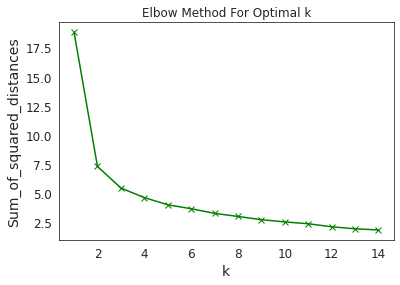

In [ ]:
#Plotting graphs for Optimal k
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**It' visible now, when k = 4 the average squared distance to cluster centre starts to trail off remarkably. This is, our optimal k.**

In [ ]:
#Making Clusters using sklearn.cluster.Kmeans
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability, for visualisation.
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

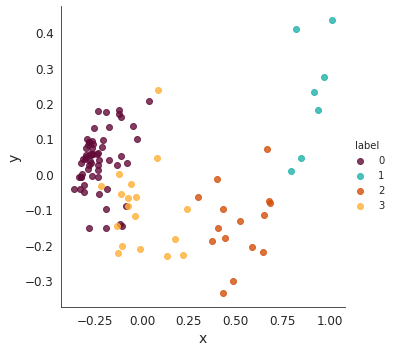

In [ ]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#Plotting data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [ ]:
#Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.
from sklearn.manifold import TSNE 

#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

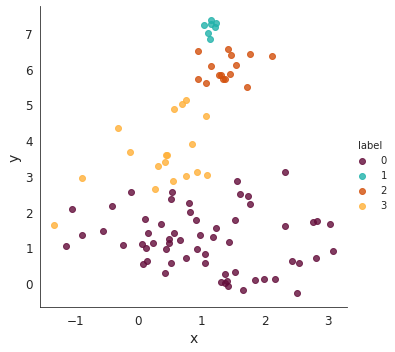

In [ ]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [ ]:
pca.explained_variance_ratio_

array([0.73646499, 0.09879449])

**The explained variance tells you how much information (variance) can be attributed to each of the principal components.**

# Exploring each of the 4 clusters and see what songs they contain.

In [ ]:
songs['label'] = y_kmeans

#Shuffling the dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

0    60
3    18
2    15
1     7
Name: label, dtype: int64

**Assigning the mood to each cluster at the songs within them and identifying the emotions that I associate with majority of songs in a cluster.**

In [ ]:
#MOOD LABEL: CHILL MOOD
songs[songs['label'] == 0].tail(10)

,name,artist,danceability,acousticness,liveness,loudness,speechiness,label
51,Boyfriend,Justin Bieber,0.717,0.03580,0.1260,0.834031,0.0521,0
90,Bang Bang,Jessie J,0.707,0.26900,0.3770,0.910954,0.0885,0
70,Rude,MAGIC!,0.774,0.04230,0.3050,0.882714,0.0389,0
77,Only You (with Little Mix),Cheat Codes,0.607,0.08290,0.1050,0.892317,0.1720,0
53,As Long As You Love Me,Justin Bieber,0.571,0.08110,0.3610,0.959399,0.1000,0
49,Make You Mine,PUBLIC,0.606,0.01280,0.1500,0.908529,0.0261,0
19,Something New (feat. Ty Dolla $ign),Wiz Khalifa,0.814,0.09350,0.0892,0.805981,0.0809,0
52,Cold Water (feat. Justin Bieber & MØ),Major Lazer,0.608,0.07360,0.1560,0.878102,0.0432,0
83,Falling to Pieces,Rita Ora,0.647,0.00966,0.2220,0.841067,0.0278,0
63,Roar,Katy Perry,0.671,0.00492,0.3540,0.890986,0.0316,0


In [ ]:
#MOOD LABEL: CHEERFUL MOOD
songs[songs['label'] == 1].tail(10)

,name,artist,danceability,acousticness,liveness,loudness,speechiness,label
46,Kiss the Rain,Yiruma,0.557,0.990,0.1450,0.242702,0.0542,1
43,River Flows In You,Yiruma,0.314,0.987,0.0802,0.105496,0.0514,1
8,"My Heart Will Go On - Love Theme from ""Titanic""",James Horner,0.157,0.801,0.1260,0.161928,0.0360,1
42,Braille,Jan A.P. Kaczmarek,0.183,0.943,0.0931,0.000000,0.0397,1
45,River Flows in You,Yiruma,0.287,0.968,0.0900,0.203337,0.0541,1
29,Memories,Ryan L Stewart,0.534,0.969,0.0780,0.342826,0.0353,1
44,Kiss The Rain,Yiruma,0.559,0.990,0.1170,0.044975,0.0423,1


In [ ]:
#MOOD LABEL: ENERGETIC MOOD
songs[songs['label'] == 2].tail(10)

,name,artist,danceability,acousticness,liveness,loudness,speechiness,label
65,All of Me,John Legend,0.422,0.922,0.1320,0.784349,0.0322,2
60,iT's YoU,ZAYN,0.611,0.815,0.1080,0.609442,0.0357,2
6,The Night We Met,Lord Huron,0.443,0.969,0.6380,0.667871,0.0441,2
4,Song for Zula,Ronnie Fauss,0.506,0.734,0.0737,0.790672,0.0246,2
0,I Will Always Love You,Whitney Houston,0.306,0.844,0.0839,0.525055,0.0356,2
76,hate u love u,Olivia O'Brien,0.407,0.656,0.0981,0.696349,0.1740,2
33,everything i wanted,Billie Eilish,0.704,0.902,0.1060,0.433013,0.0994,2
48,Memories,Maroon 5,0.764,0.837,0.0822,0.777456,0.0546,2
35,This Town,Niall Horan,0.677,0.712,0.1160,0.717648,0.0308,2
87,My Everything,Ariana Grande,0.540,0.880,0.1310,0.867881,0.0297,2


In [ ]:
#MOOD LABEL: ROMANTIC MOOD
songs[songs['label'] == 3].tail(10)

,name,artist,danceability,acousticness,liveness,loudness,speechiness,label
61,"thank u, next",Ariana Grande,0.717,0.229,0.1010,0.852334,0.0658,3
79,Eastside (with Halsey & Khalid),benny blanco,0.560,0.555,0.1160,0.756585,0.3210,3
47,Say So,Doja Cat,0.787,0.256,0.0904,0.902586,0.1580,3
74,I Like Me Better,Lauv,0.752,0.535,0.1040,0.757868,0.2530,3
20,Supalonely,BENEE,0.863,0.305,0.1230,0.897262,0.0534,3
34,Next To You Part II (feat. Rvssian & Davido),Becky G,0.674,0.284,0.1520,0.886232,0.0781,3
72,What Do You Mean?,Justin Bieber,0.845,0.590,0.0811,0.734240,0.0956,3
66,Without Me,Halsey,0.752,0.297,0.0936,0.785015,0.0705,3
23,"Alone, Pt. II",Alan Walker,0.670,0.536,0.1330,0.915470,0.0422,3
31,bad guy,Billie Eilish,0.701,0.328,0.1000,0.598888,0.3750,3


**Plotting histogram for each cluster based on their features that we have choosed**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc39dfdf98>,
      dtype=object)

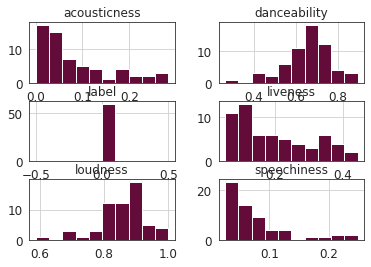

In [ ]:
songs[songs['label']==0].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc3a6d0978>,
      dtype=object)

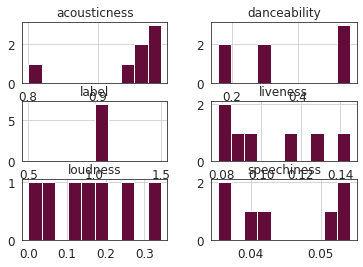

In [ ]:
songs[songs['label']==1].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc39a930f0>,
      dtype=object)

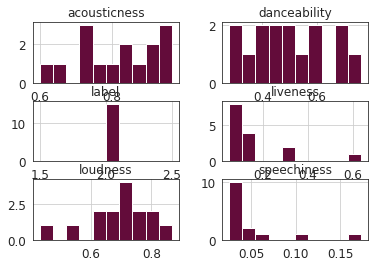

In [ ]:
songs[songs['label']==2].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc398fcda0>,
      dtype=object)

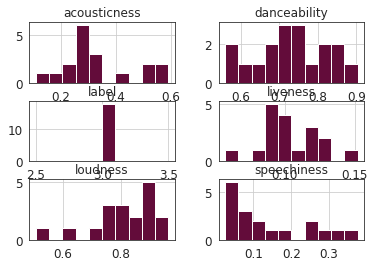

In [ ]:
songs[songs['label']==3].hist()

# Using Classifier's: Random Forest, Knn, SVM And MLP Classifier.

*Classifier will handle the missing values and maintain the accuracy of a large proportion of data.*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

#Splitting Dataset into Training Set and Test Set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)
y_pred

array([3, 0, 3, 3, 0, 1, 2, 0, 0, 1, 0, 1, 0, 3, 3, 3, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3], dtype=int32)

*Confusion matrix: A confusion matrix is a table that is often used to describe the performance of a classification model or “classifier”) on a set of test data for which the true values are known*

In [ ]:

def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.PuRd):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'
    #Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True',
           xlabel='Predicted')
    
    #Rotating the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    #Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[17  0  0  2]
 [ 0  3  1  0]
 [ 0  0  3  0]
 [ 0  0  0  7]]


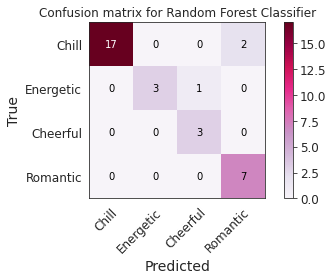

In [ ]:
definitions = ['Chill','Energetic','Cheerful','Romantic']
plot_confusion_matrix(y_test, y_pred, classes=definitions,title='Confusion matrix for Random Forest Classifier')

In [ ]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('danceability', 0.13124844100305819),
 ('acousticness', 0.4968245911088619),
 ('liveness', 0.08315724965782333),
 ('loudness', 0.1615070135519443),
 ('speechiness', 0.12726270467831224)]

In [ ]:
#Import Knn model
from sklearn.neighbors import KNeighborsClassifier

#Create a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train,y_train)

#Predict the response for test dataset
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[17  0  0  2]
 [ 0  3  1  0]
 [ 0  0  3  0]
 [ 0  0  0  7]]


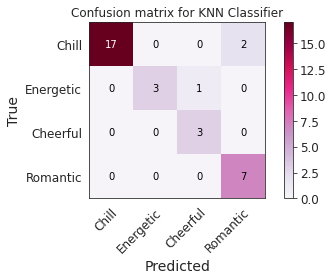

In [ ]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,title='Confusion matrix for KNN Classifier')

In [ ]:
#Import SVM model
from sklearn import svm

#Create a SVM Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[19  0  0  0]
 [ 0  0  4  0]
 [ 0  0  3  0]
 [ 6  0  1  0]]


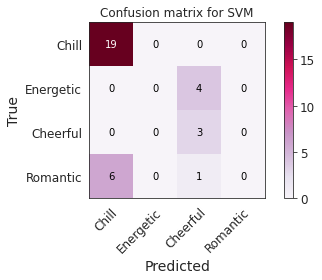

In [ ]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,title='Confusion matrix for SVM')

In [ ]:
#Import MLP model
from sklearn.neural_network import MLPClassifier

#Create a MLP Classifier
mlp = MLPClassifier()

#Train the model using the training sets
mlp.fit(X_train, y_train)

#Predict the response for test dataset
mlp_pred = mlp.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion matrix, without normalization
[[19  0  0  0]
 [ 0  0  4  0]
 [ 0  0  3  0]
 [ 4  0  0  3]]


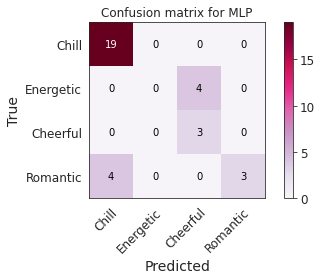

In [ ]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,title='Confusion matrix for MLP')

In [ ]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

       Chill       0.83      1.00      0.90        19
   Energetic       0.00      0.00      0.00         4
    Cheerful       0.43      1.00      0.60         3
    Romantic       1.00      0.43      0.60         7

    accuracy                           0.76        33
   macro avg       0.56      0.61      0.53        33
weighted avg       0.73      0.76      0.70        33
MLP


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

       Chill       0.76      1.00      0.86        19
   Energetic       0.00      0.00      0.00         4
    Cheerful       0.38      1.00      0.55         3
    Romantic       0.00      0.00      0.00         7

    accuracy                           0.67        33
   macro avg       0.28      0.50      0.35        33
weighted avg       0.47      0.67      0.55        33
SVM


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

       Chill       1.00      0.89      0.94        19
   Energetic       1.00      0.75      0.86         4
    Cheerful       0.75      1.00      0.86         3
    Romantic       0.78      1.00      0.88         7

    accuracy                           0.91        33
   macro avg       0.88      0.91      0.88        33
weighted avg       0.93      0.91      0.91        33
KNN


In [ ]:
print(classification_report(y_test,y_pred,target_names=definitions)+'RF')

              precision    recall  f1-score   support

       Chill       1.00      0.89      0.94        19
   Energetic       1.00      0.75      0.86         4
    Cheerful       0.75      1.00      0.86         3
    Romantic       0.78      1.00      0.88         7

    accuracy                           0.91        33
   macro avg       0.88      0.91      0.88        33
weighted avg       0.93      0.91      0.91        33
RF
